## Loading data

In [1]:
import torch
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Define a transform to convert the images to tensor
transform = transforms.Compose([transforms.ToTensor()])

In [3]:
# Download the MNIST training dataset
mnist_train = datasets.MNIST(root='../data', train=True, download=True, transform=transform)

# Download the MNIST test dataset
mnist_test = datasets.MNIST(root='../data', train=False, download=True, transform=transform)


In [4]:
# Convert to NumPy arrays
train_data_np = mnist_train.data.numpy()

In [5]:
image = train_data_np[0]

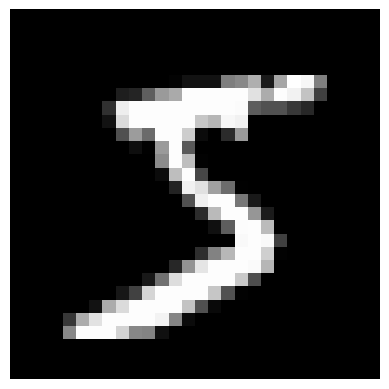

In [6]:
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

# data processing


In [30]:
from torch.utils.data import DataLoader
train_loader = DataLoader(dataset=mnist_train, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=mnist_test, batch_size=64, shuffle=False)

In [31]:
for images, labels in train_loader:
    print(f"Batch of images shape: {images.shape}")
    print(f"Batch of labels shape: {labels.shape}")
    break  # Remove this line to iterate through the entire DataLoader

Batch of images shape: torch.Size([64, 1, 28, 28])
Batch of labels shape: torch.Size([64])


Batch of images shape: torch.Size([64, 1, 28, 28])
Batch of labels shape: torch.Size([64])


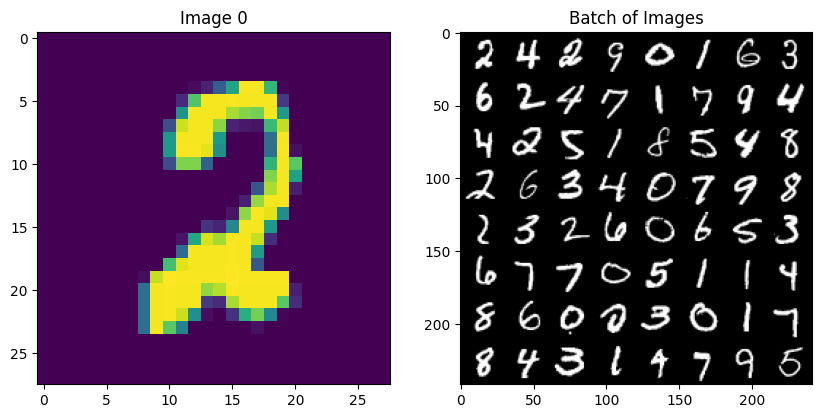

Label: 2


In [ ]:
# display the first image and label in train_loader
import torchvision
for images, labels in train_loader:
    print(f"Batch of images shape: {images.shape}")
    print(f"Batch of labels shape: {labels.shape}")
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(images[0].permute(1, 2, 0).numpy()) 
    """
    images[0]: This selects the first image in the batch. Since images is a tensor with shape (64, 1, 28, 28), images[0] is a tensor with shape (1, 28, 28).
    .permute(1, 2, 0): This permutes the dimensions of the tensor. In this case, it changes the order from (1, 28, 28) to (28, 28, 1). This is because plt.imshow expects the image data to be in the shape (height, width, channels), where channels is usually 3 for RGB images. Since our images are grayscale, we only have 1 channel.
    .numpy(): This converts the tensor to a NumPy array. plt.imshow can only display NumPy arrays, so we need to convert the tensor to a NumPy array.
    """
    plt.title(f"Image {0}")
    plt.subplot(1, 2, 2)
    plt.imshow(torchvision.utils.make_grid(images).permute(1, 2, 0).numpy())
    """
    torchvision.utils.make_grid(images): This creates a grid of all the images in the batch. The make_grid function takes a batch of images and stacks them horizontally to create a grid. The grid is then returned as a tensor.
    .permute(1, 2, 0): This permutes the dimensions of the tensor, just like in the first plot. It changes the order from (batch_size, channels, height, width) to (height, width, channels).
    .numpy(): This converts the tensor to a NumPy array, just like in the first plot.
    """
    plt.title(f"Batch of Images")
    plt.show()
    print(f"Label: {labels[0]}")
    break